In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

from simplicial_kuramoto.frustration_scan import *

In [2]:
# Harmonic flow
def plot_Harm(Gsc, results, alpha1, alpha2):
    HarmFlow=sc.linalg.null_space(Gsc.L1.todense())

    fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
    axs = np.flip(axs, axis=0)
    for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
        plt.sca(axs[idx_a1, idx_a2])
        result = results[i][0]
        plt.plot(result.y.T.dot(HarmFlow))
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    for idx_a1 in range(len(alpha1)):
        axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
    for idx_a2 in range(len(alpha2)):
        axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

    fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
    fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
    fig.tight_layout()

In [3]:
# Gradient flow
def plot_Grad(Gsc, results, alpha1, alpha2):
    GradFlow=sc.linalg.orth(Gsc.B0.todense())

    fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
    axs = np.flip(axs, axis=0)
    for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
        plt.sca(axs[idx_a1, idx_a2])
        result = results[i][0]
        plt.plot(result.y.T.dot(GradFlow))
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    for idx_a1 in range(len(alpha1)):
        axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
    for idx_a2 in range(len(alpha2)):
        axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

    fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
    fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
    fig.tight_layout()

In [4]:
# Curl flow
def plot_Curl(Gsc, results, alpha1, alpha2):
    CurlFlow=sc.linalg.orth(Gsc.B1.T.todense())
    
    fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
    axs = np.flip(axs, axis=0)
    for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
        plt.sca(axs[idx_a1, idx_a2])
        result = results[i][0]
        plt.plot(result.y.T.dot(CurlFlow))
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    for idx_a1 in range(len(alpha1)):
        axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
    for idx_a2 in range(len(alpha2)):
        axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

    fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
    fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
    fig.tight_layout()

## Square

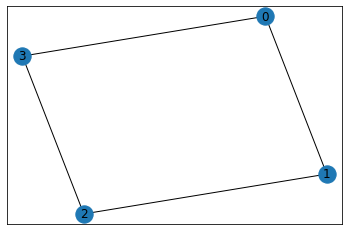

In [5]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,3,4).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

# Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

In [6]:
folder = "./results/"

path = folder + "square.pkl"

Gsc, results, alpha1, alpha2 = pickle.load(open(path, "rb"))

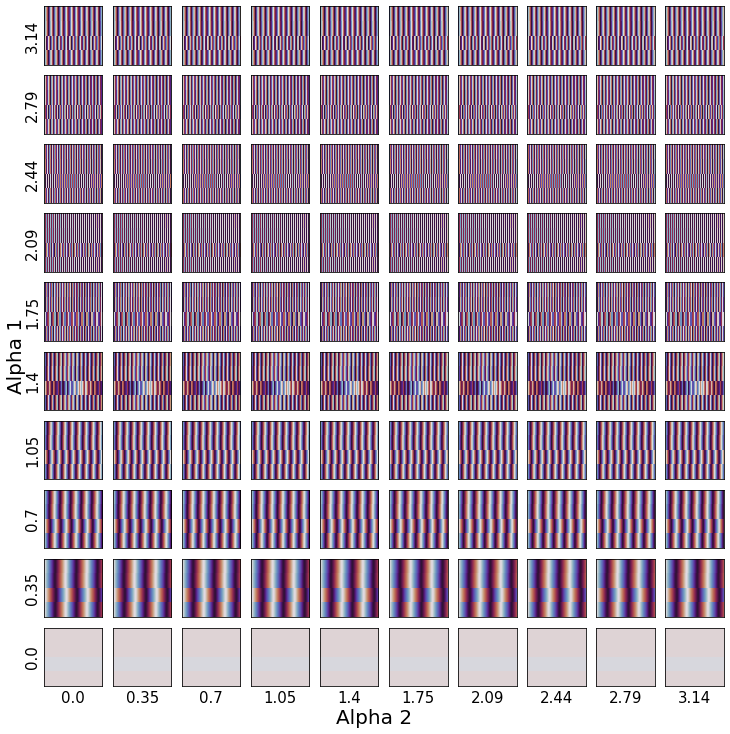

In [7]:
fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
axs = np.flip(axs, axis=0)
for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
    plt.sca(axs[idx_a1, idx_a2])
    result = results[i][0]
    plt.imshow(
        np.round(result.y + np.pi, 2) % (2 * np.pi) - np.pi,
        origin="lower",
        aspect="auto",
        cmap="twilight_shifted",
        interpolation="nearest",
        extent=(result.t[0], result.t[-1], 0, len(result.y)),
        vmin=-np.pi,
        vmax=np.pi,
    )
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for idx_a1 in range(len(alpha1)):
    axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
for idx_a2 in range(len(alpha2)):
    axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
fig.tight_layout()

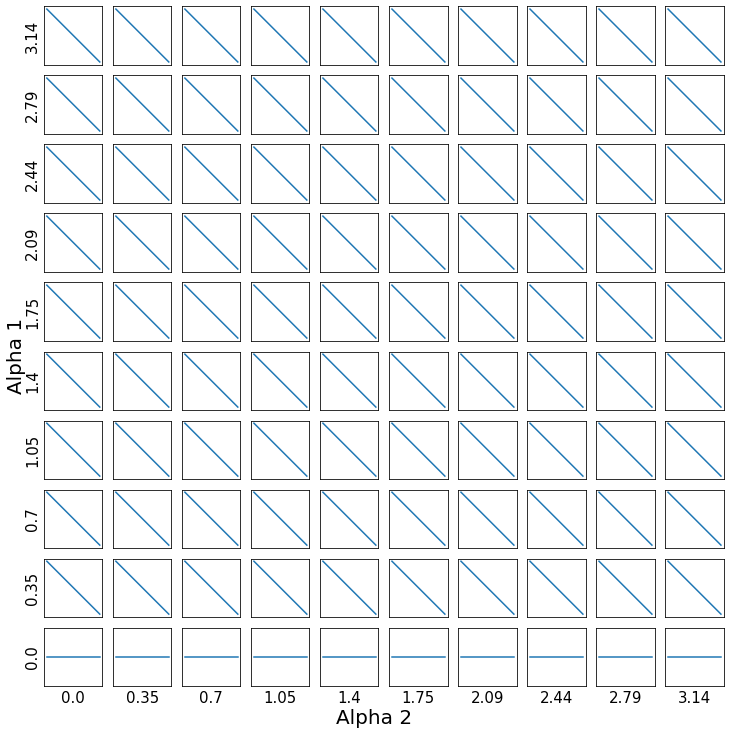

In [8]:
plot_Harm(Gsc, results, alpha1, alpha2)

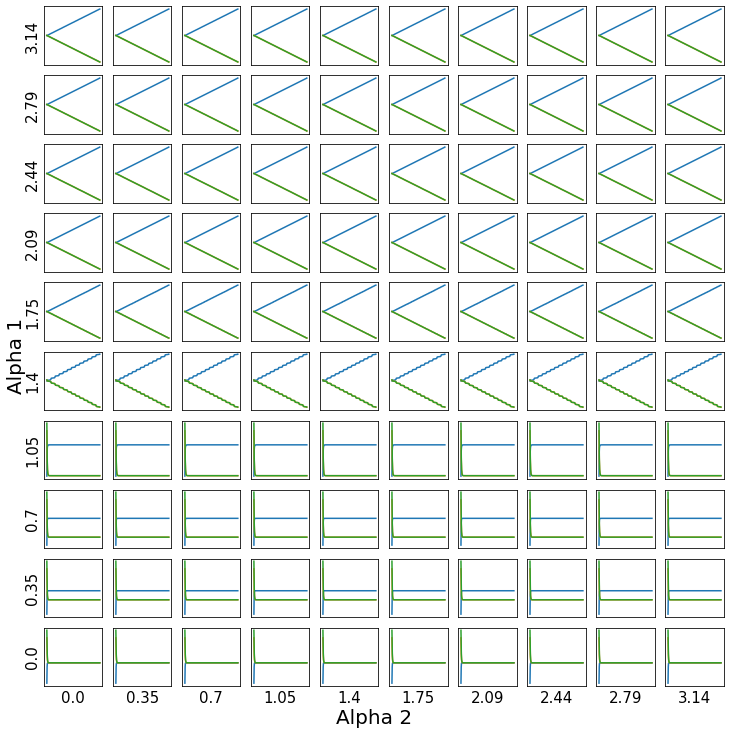

In [9]:
plot_Grad(Gsc, results, alpha1, alpha2)

In [10]:
folder = "./results/"

path = folder + "square_flip.pkl"

Gsc, results, alpha1, alpha2 = pickle.load(open(path, "rb"))

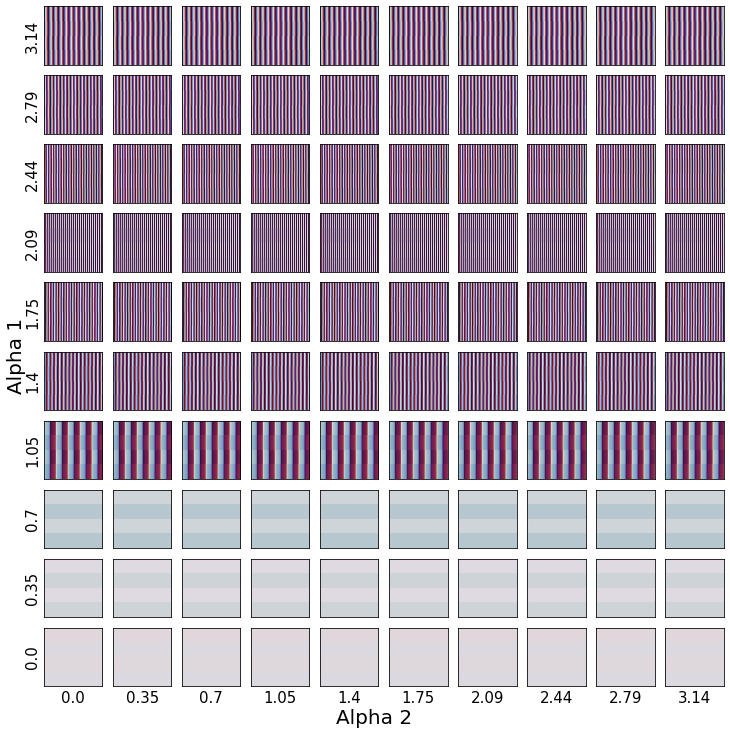

In [11]:
fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
axs = np.flip(axs, axis=0)
for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
    plt.sca(axs[idx_a1, idx_a2])
    result = results[i][0]
    plt.imshow(
        np.round(result.y + np.pi, 2) % (2 * np.pi) - np.pi,
        origin="lower",
        aspect="auto",
        cmap="twilight_shifted",
        interpolation="nearest",
        extent=(result.t[0], result.t[-1], 0, len(result.y)),
        vmin=-np.pi,
        vmax=np.pi,
    )
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for idx_a1 in range(len(alpha1)):
    axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
for idx_a2 in range(len(alpha2)):
    axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
fig.tight_layout()

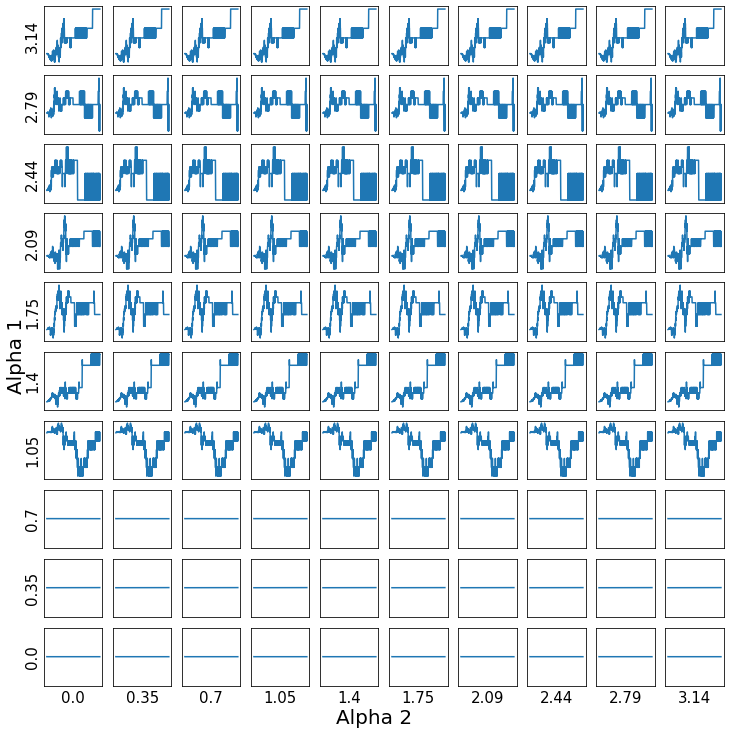

In [12]:
plot_Harm(Gsc, results, alpha1, alpha2)

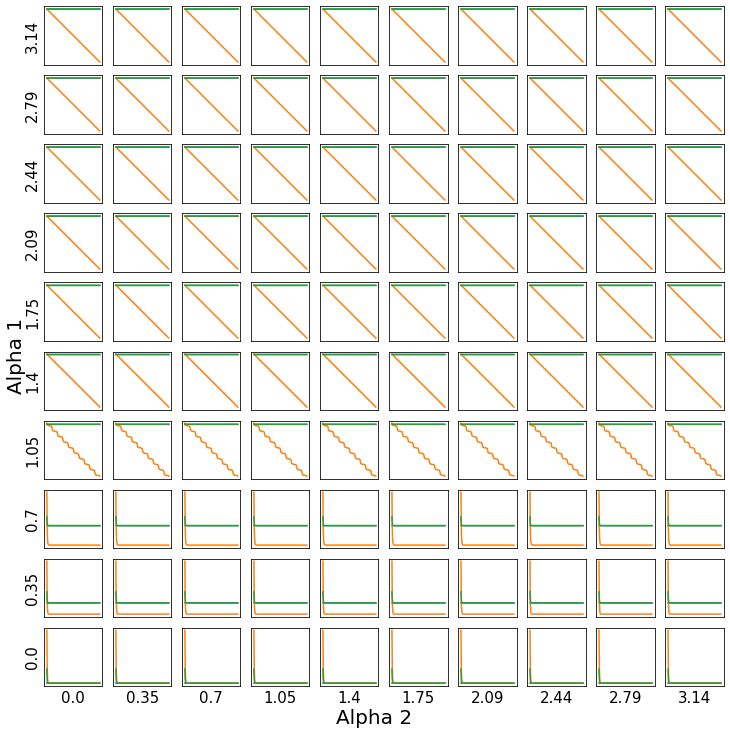

In [13]:
plot_Grad(Gsc, results, alpha1, alpha2)

## House

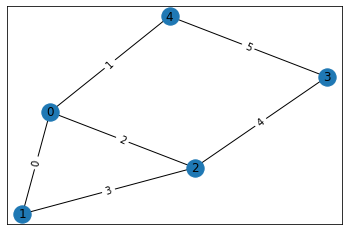

In [14]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,4,weight=1,edge_com=0)
G.add_edge(4,0,weight=1,edge_com=0)
# G.add_edge(5,0,weight=1,edge_com=0)

G.add_edge(2,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,5,6).astype(int)),[0,0,0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

# plt.figure()
# nx.draw_networkx(G)
# plt.show()
pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)

In [15]:
folder = "./results/"

path = folder + "house.pkl"

Gsc, results, alpha1, alpha2 = pickle.load(open(path, "rb"))

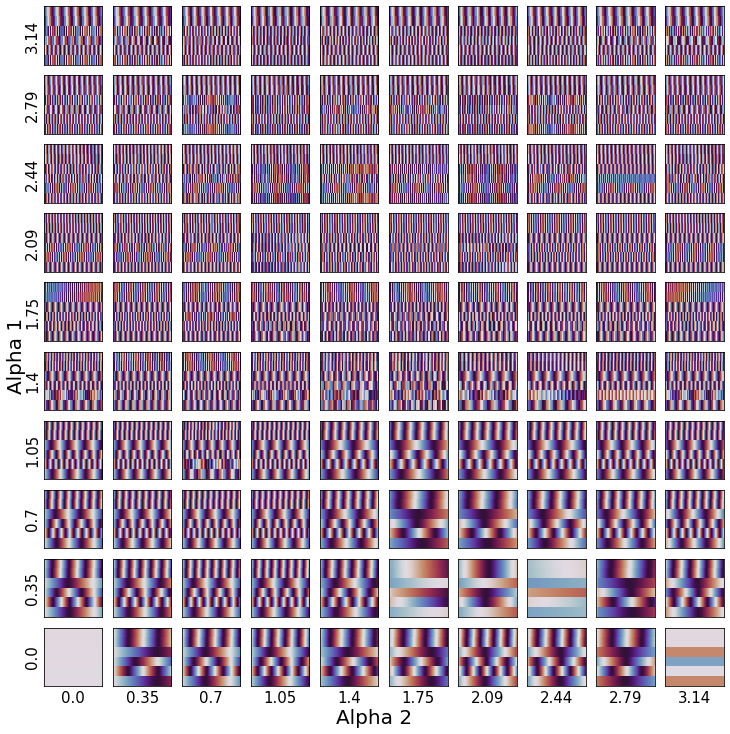

In [16]:
fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
axs = np.flip(axs, axis=0)
for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
    plt.sca(axs[idx_a1, idx_a2])
    result = results[i][0]
    plt.imshow(
        np.round(result.y + np.pi, 2) % (2 * np.pi) - np.pi,
        origin="lower",
        aspect="auto",
        cmap="twilight_shifted",
        interpolation="nearest",
        extent=(result.t[0], result.t[-1], 0, len(result.y)),
        vmin=-np.pi,
        vmax=np.pi,
    )
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for idx_a1 in range(len(alpha1)):
    axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
for idx_a2 in range(len(alpha2)):
    axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
fig.tight_layout()

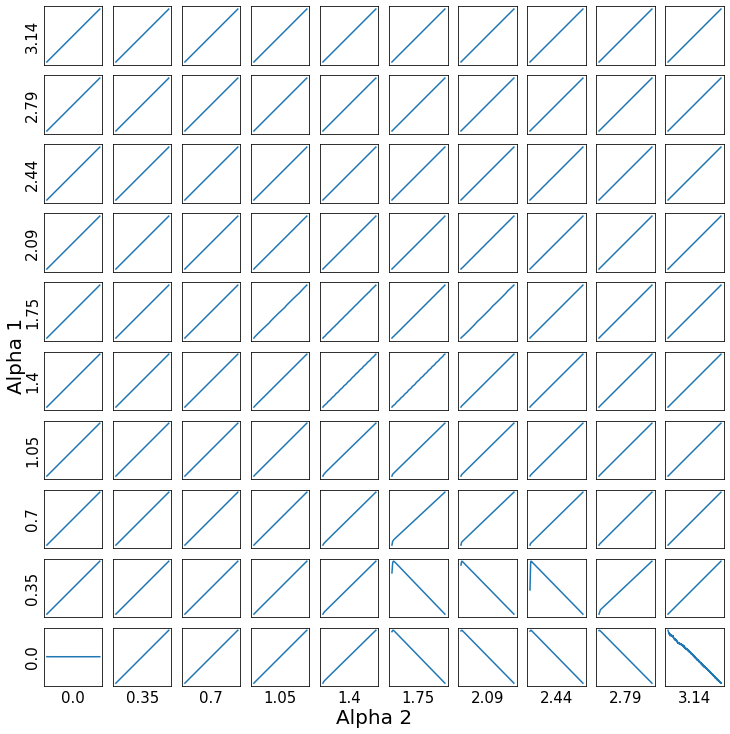

In [17]:
plot_Harm(Gsc, results, alpha1, alpha2)

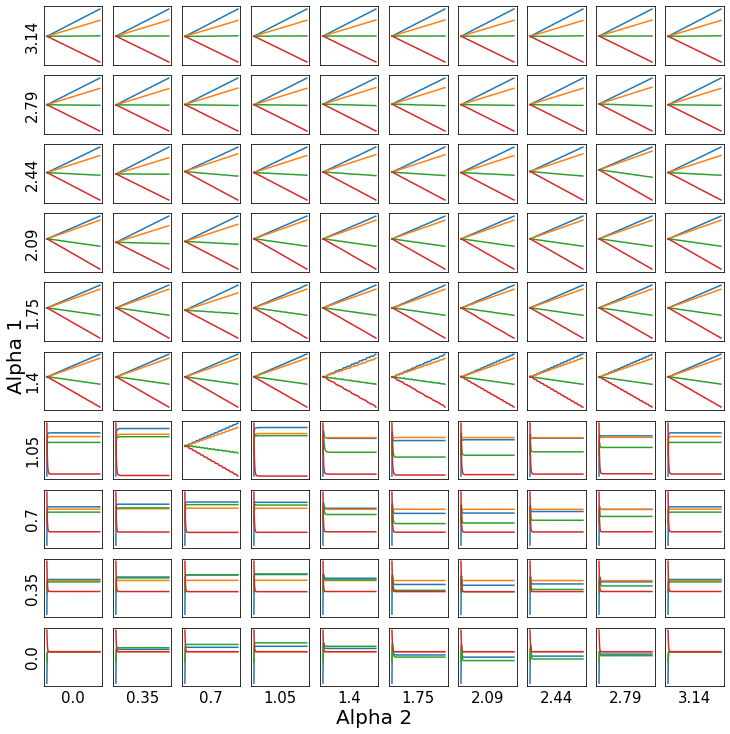

In [18]:
plot_Grad(Gsc, results, alpha1, alpha2)

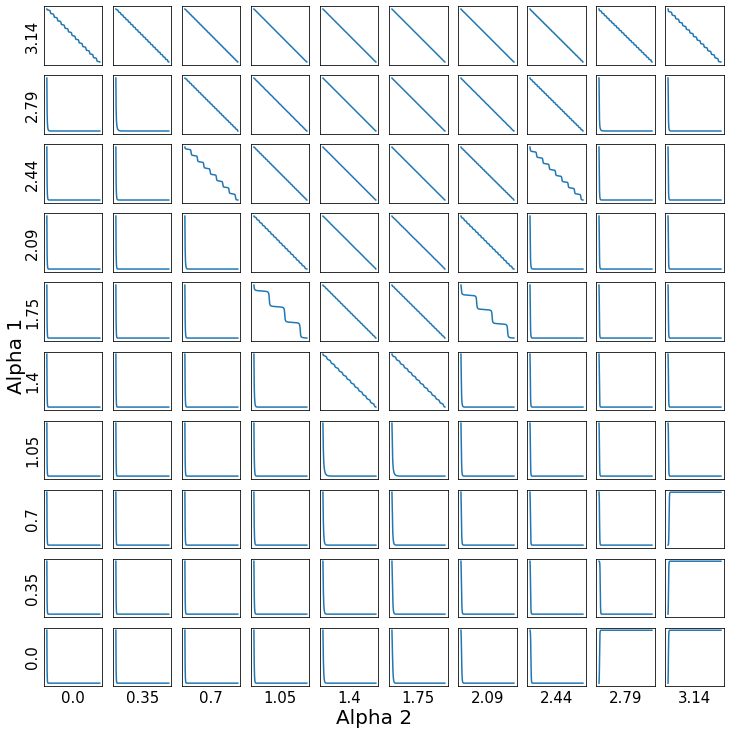

In [19]:
plot_Curl(Gsc, results, alpha1, alpha2)

In [20]:
folder = "./results/"

path = folder + "house_triangle_cyle.pkl"

Gsc, results, alpha1, alpha2 = pickle.load(open(path, "rb"))

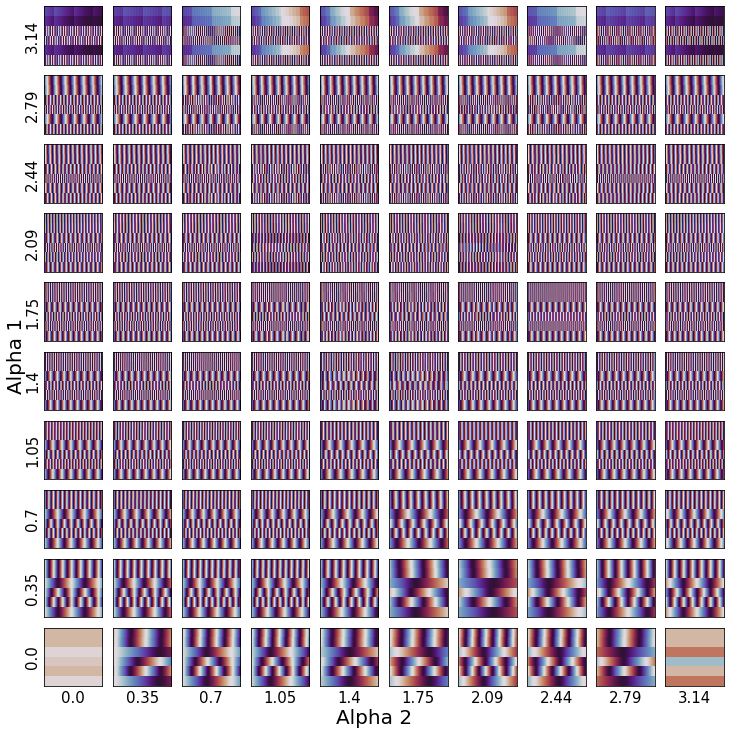

In [21]:
fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
axs = np.flip(axs, axis=0)
for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
    plt.sca(axs[idx_a1, idx_a2])
    result = results[i][0]
    plt.imshow(
        np.round(result.y + np.pi, 2) % (2 * np.pi) - np.pi,
        origin="lower",
        aspect="auto",
        cmap="twilight_shifted",
        interpolation="nearest",
        extent=(result.t[0], result.t[-1], 0, len(result.y)),
        vmin=-np.pi,
        vmax=np.pi,
    )
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for idx_a1 in range(len(alpha1)):
    axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
for idx_a2 in range(len(alpha2)):
    axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
fig.tight_layout()

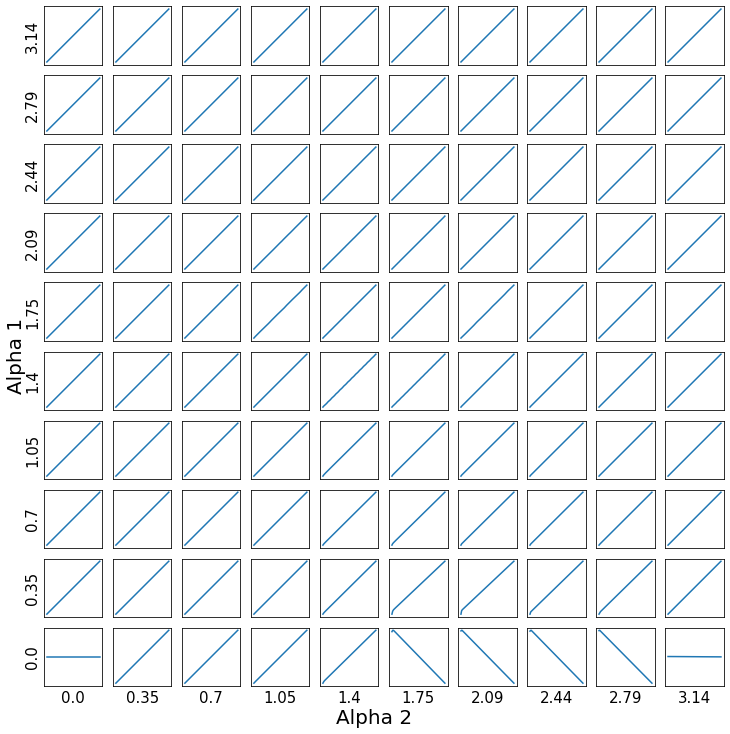

In [22]:
plot_Harm(Gsc, results, alpha1, alpha2)

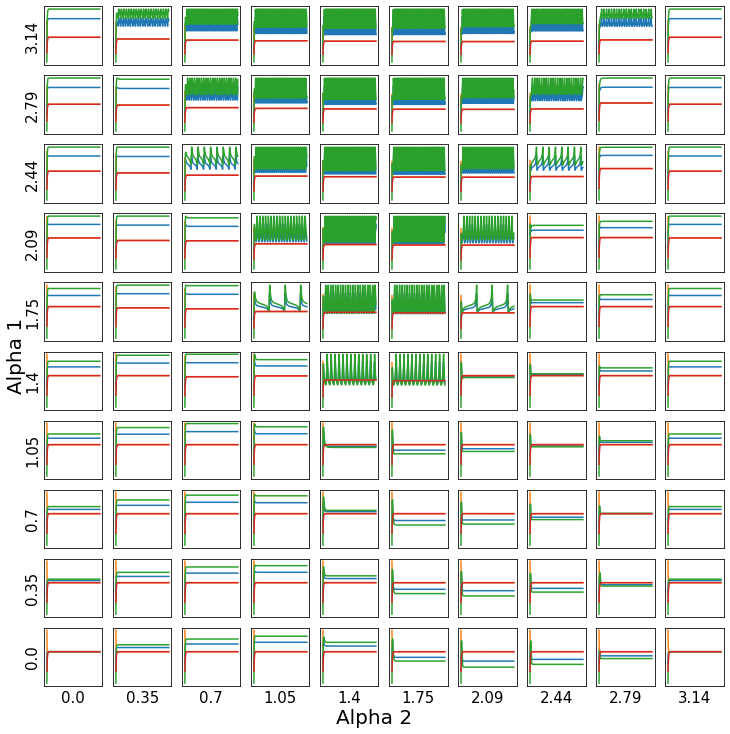

In [23]:
plot_Grad(Gsc, results, alpha1, alpha2)

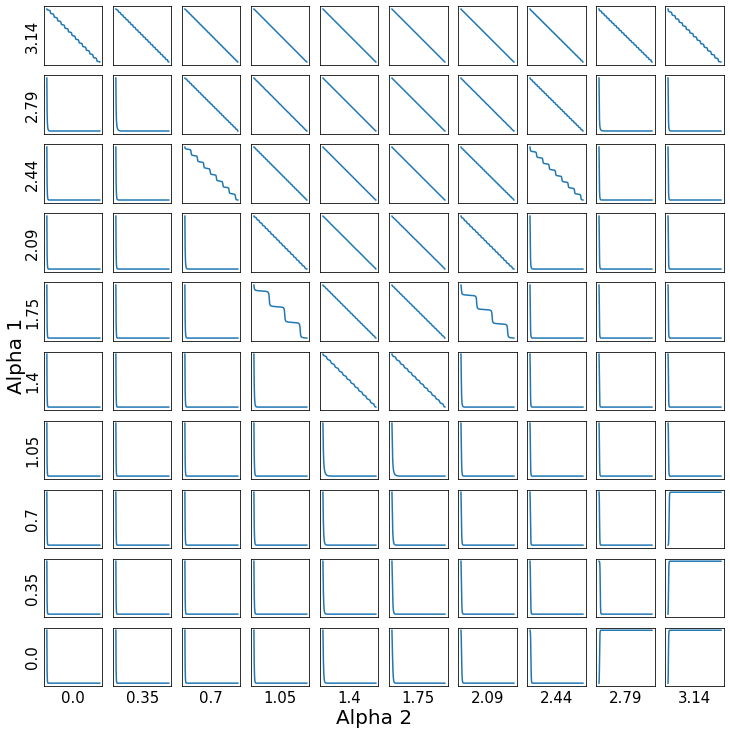

In [24]:
plot_Curl(Gsc, results, alpha1, alpha2)

## Barbell 2-3

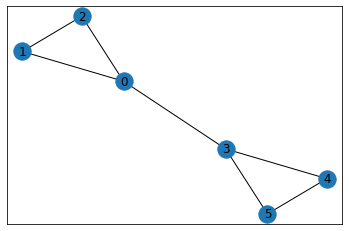

In [25]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,0,weight=1,edge_com=0)

G.add_edge(0,3,weight=1,edge_com=1)

G.add_edge(3,4,weight=1,edge_com=2)
G.add_edge(4,5,weight=1,edge_com=2)
G.add_edge(5,3,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,5,6).astype(int)),[0,0,0,1,1,1]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

# Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

In [26]:
folder = "./results/"

path = folder + "barbell_2_3.pkl"

Gsc, results, alpha1, alpha2 = pickle.load(open(path, "rb"))

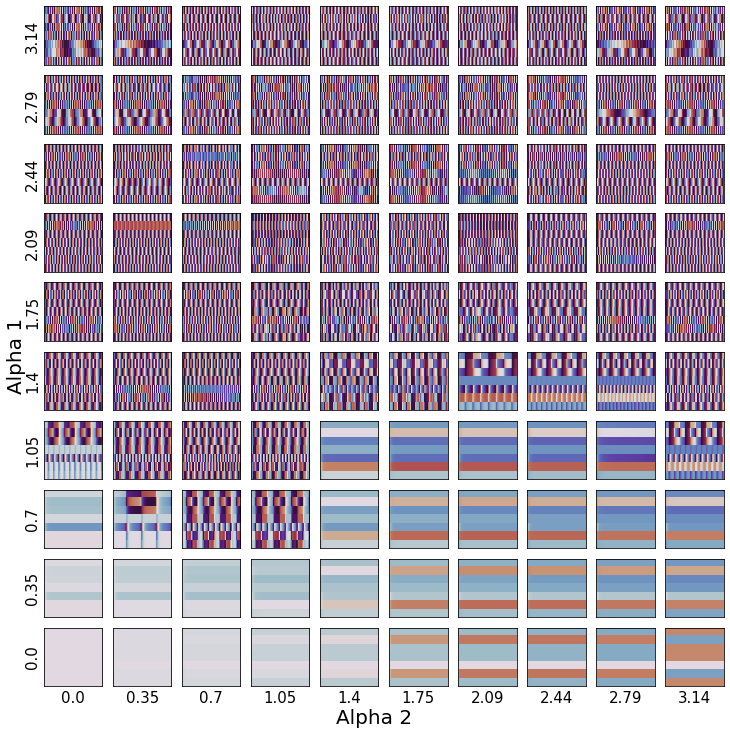

In [27]:
fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
axs = np.flip(axs, axis=0)
for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
    plt.sca(axs[idx_a1, idx_a2])
    result = results[i][0]
    plt.imshow(
        np.round(result.y + np.pi, 2) % (2 * np.pi) - np.pi,
        origin="lower",
        aspect="auto",
        cmap="twilight_shifted",
        interpolation="nearest",
        extent=(result.t[0], result.t[-1], 0, len(result.y)),
        vmin=-np.pi,
        vmax=np.pi,
    )
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for idx_a1 in range(len(alpha1)):
    axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
for idx_a2 in range(len(alpha2)):
    axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
fig.tight_layout()

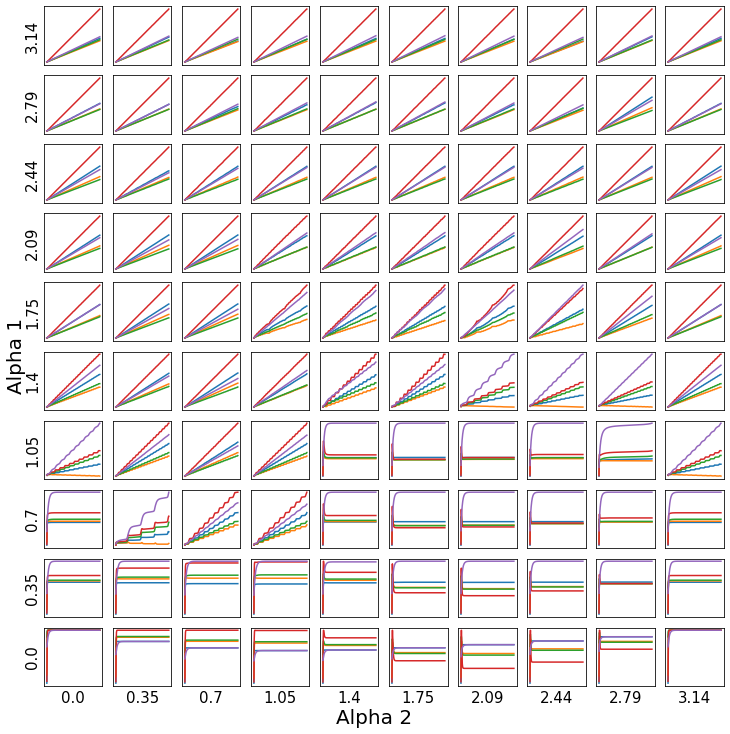

In [28]:
plot_Grad(Gsc, results, alpha1, alpha2)

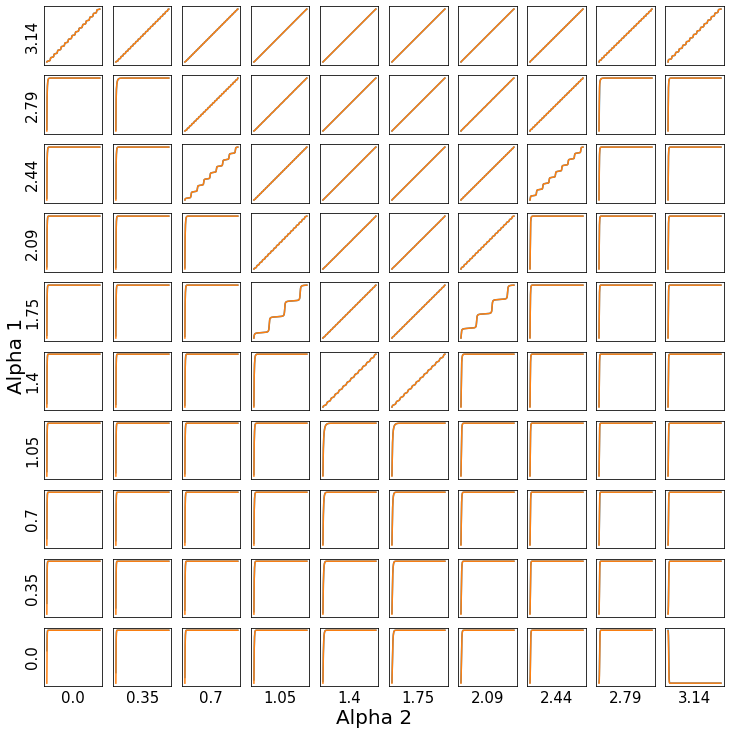

In [29]:
plot_Curl(Gsc, results, alpha1, alpha2)